# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv') # Monthly search volume from Google Trends.

df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv') # Monthly search volume from Google Trends.

df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv') # Monthly search volume from Google Trends.
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv') # Day-by-day closing price and the trade volume of Bitcoin.

# A nice function to keep track of dataframes. Not sure if it will work in all cases.
def my_dfs(type='str'):
    str_df_list = [var_name for var_name in globals() if isinstance(globals()[var_name], pd.DataFrame)]
    if type == 'str':
        return str_df_list
    else:
        obj_list = []
        for df_name in str_df_list:
            df = eval(df_name)
            obj_list.append(df)
        return obj_list

my_dfs()

['df_tesla', 'df_unemployment', 'df_btc_search', 'df_btc_price']

## A side track: How to generate a list of string from a list of dataframes?

```python
trend_dfs_list = [df_tesla, df_unemployment, df_btc_search]
str_trend_dfs_list = [var_name for var_name in locals().keys() if id(eval(var_name)) in [id(j) for j in trend_dfs_list]]
>>> ['df_tesla', 'df_btc_search', 'df_unemployment']
````

- Get a dict of the local variables in the current scope with locals(). 

```python
local_var_names = locals().keys()
>>> 
"['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', \
'__builtins__', [...], 'plt', 'pd', '_i2', 'df_tesla', 'df_btc_search', 'df_btc_price', \
'df_unemployment', '_i3', 'trend_dfs_list', 'web_search_columns_list', [...]]"
```

Then, iterate over the keys (the locally defined variable names) of the dict.
For each var_name in the loop:

- The eval() function evaluates the value of the variable with that name. 
    eval('var_name') returns the actual object referenced by the variable. 
    For example, the output of <print(eval('df_tesla'))> is the same as 
    print(df_tesla) -> The dataframe.
            
```python
eval('df_tesla')
>>> 
          MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0    2010-06-01                3        4.766000
1    2010-07-01                3        3.988000
..          ...              ...             ...
122  2020-08-01               23      498.320007
123  2020-09-01               31      407.339996

[124 rows x 3 columns]
```
 
- The id() function returnes the unique idetifier (ID) of an object. 
    In this case, id(eval(var_name)) returns the ID of the evaluated object.
    
```python
local_var_IDs = [id(eval(var_name)) for var_name in locals().keys()]
>>> [140726677995032, 2691121428528, 140726676581104, 140726676581104, 140726676581104, 2691070990416, 
     2691070990416, 2691166473728, 2691166473920, 2691166473792, 2691166473728, 2691166473920, ...]
```
        
Inside the list comprehension, we have another list comprehension: `[id(j) for j in trend_dfs_list]`, 
which generates a list of the IDs of the DataFrame objects in trend_dfs_list.

```python
trend_dfs_list_IDs = [id(j) for j in trend_dfs_list]
>>> [2691233911952, 2691233808592, 2691233781008]
```

# Data Exploration

## Tesla, Unemployment Data and Bitcoin

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?<br><br></li>
    <ul>
        <li>
            "[...] data on the Trends Explore tool is indexed and normalized. But what does this actually mean?<br><strong>Indexing:</strong> Google Trends data is pulled from a random, unbiased sample of Google searches, which means we don’t have exact numbers for any terms or topics. In order to give a value to terms, we index data from 1-100, where 100 is the maximum search interest for the time and location selected.
            <br><br>
    <strong>Normalization:</strong> When we look at search interest in a topic or query, we are not looking at the total number of searches. Instead, we look at the percentage of searches for that topic, as a proportion of all searches at that time and location." 
            (<a href="https://newsinitiative.withgoogle.com/resources/lessons/basics-of-google-trends/">
            Basics of Google Trends.
            </a>)<br><br>
        </li>
        <li>
            "<strong>Reading the Interest Over Time graph.</strong>
When you search for a term on Trends, you’ll see a graph showing the term’s popularity over time in (nearly) real time. Hovering your mouse over the graph reveals a number, which reflects how many searches have been done for the particular term relative to the total number of searches done on Google.<br><br>
Numbers on the graph don't represent absolute search volume numbers, because the data is normalised and presented on a scale from 0-100, where each point on the graph is divided by the highest point, or 100. The numbers next to the search terms at the top of the graph are sums, or totals.<br><br>
A line trending downward means that a search term's relative popularity is decreasing—not necessarily that the total number of searches for that term is decreasing, but that its popularity compared to other searches is shrinking." (<a href="https://newsinitiative.withgoogle.com/resources/lessons/google-trends-understanding-the-data/">Google Trends: Understanding the data.</a>)<br><br>
        </li>
        <li>
            "Google's search interest ranges between 0 and 100. Google defines the values of search interest as: <strong>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</strong> Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.<br><br>
For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy."<br><br>
            Here are the Google Trends Search Parameters that I used to generate the .csv data:
            <ul>
                <li>"Tesla", Worldwide, Web Search
                <li>"Bitcoin", Worldwide, News Search
                <li>"Unemployment Benefits", United States, Web Search
            </ul>
            (<a href="https://www.udemy.com/course/100-days-of-code/learn/lecture/22512436#questionshttps://www.udemy.com/course/100-days-of-code/learn/lecture/22512436#questions">Angela Yu, 100 Days of Code, on Udemy</a>)
        </li>
    </ul>
</ul>

In [3]:
dfs_list = ['df_tesla', 'df_unemployment', 'df_btc_search']
trend_dfs_list = [df_tesla, df_unemployment, df_btc_search]
web_search_columns_list = ["TSLA_WEB_SEARCH", "UE_BENEFITS_WEB_SEARCH", "BTC_NEWS_SEARCH"]

for i in range(3):
    df = trend_dfs_list[i]
    smallest_web_search_value = df[f'{web_search_columns_list[i]}'].min()
    largest_web_search_value = df[f'{web_search_columns_list[i]}'].max()
    print(
        f"_______________________________________________\n\n"
        f"***** {dfs_list[i]} *****\n",
        f"Number of rows and columns:{df.shape}.\n",
        f"Column names: {', '.join(df.columns.to_list())}.\n",
        f"Time period: {df.MONTH.min()} to {df.MONTH.max()}.\n",
        f"Periodicity: Monthly.\n",
        f'Smallest and largest value for "{web_search_columns_list[i]}": {smallest_web_search_value} - {largest_web_search_value}.\n'
    )
    print(df[:3], '\n')
    print(df.describe(), '\n')
    print(df.dtypes)
    
    
print(
    f"_______________________________________________\n\n"
    "***** df_btc_price *****\n",
    f"\nNumber of rows and columns: {df_btc_price.shape}.\n",
    f"Column names: {', '.join(df_btc_price.columns.to_list())}.\n",
    f"Time period: {df_btc_price['DATE'].min()} to {df_btc_price['DATE'].max()}.\n",
    f"Periodicity: Daily.\n")

print(df_btc_price[:3], '\n')
print(df_btc_price.describe(), '\n')
print(df.dtypes)

_______________________________________________

***** df_tesla *****
 Number of rows and columns:(124, 3).
 Column names: MONTH, TSLA_WEB_SEARCH, TSLA_USD_CLOSE.
 Time period: 2010-06-01 to 2020-09-01.
 Periodicity: Monthly.
 Smallest and largest value for "TSLA_WEB_SEARCH": 2 - 31.

        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896 

       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007 

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object
_______________________________________________

***** df_unemployment *****

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

`df.isna().values.any()` returns True if there are any NaN-values in df.


In [4]:
nan_in_df_btc_price = df_btc_price.isna().values.any()
print(f"Any NaN values in df_tesla: {df_tesla.isna().values.any()}\n"
     f"Any NaN values in df_btc_price: {df_btc_price.isna().values.any()}")

Any NaN values in df_tesla: False
Any NaN values in df_btc_price: True


In [5]:
for df_name in my_dfs()[:4]:
    print(f"***** {df_name} *****\n"
          f"{eval(df_name).isna().sum()}\n")

***** df_tesla *****
MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

***** df_unemployment *****
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

***** df_btc_search *****
MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64

***** df_btc_price *****
DATE      0
CLOSE     1
VOLUME    1
dtype: int64



In [6]:
print(f'Missing values for Tesla?: \n{df_tesla.isna().sum()}\n')

print(f'Missing values for UE?: \n{df_unemployment.isna().sum()}\n')

print(f'Missing values for BTC Search?: \n{df_btc_search.isna().sum()}\n')

print(f'Missing values for BTC price?:\n{df_btc_price.isna().sum()}')
print(f'--> Number of missing values: {df_btc_price.isna().sum().sum()}')

Missing values for Tesla?: 
MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

Missing values for UE?: 
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

Missing values for BTC Search?: 
MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64

Missing values for BTC price?:
DATE      0
CLOSE     1
VOLUME    1
dtype: int64
--> Number of missing values: 2


In [7]:
missing = df_btc_price.isnull().to_numpy().nonzero()
index_list = list(missing[0]) # --> [2148, 2148]
col_list = list(missing[1]) # --> [1, 2]

print(f"{index_list = }\n{col_list  =}\n")

print("Missing values coordinates:")
for i in range(len(index_list)):
    print(f"{df_btc_price.columns[i]}: {[index_list[i], col_list[i]]}")

index_list = [2148, 2148]
col_list  =[1, 2]

Missing values coordinates:
DATE: [2148, 1]
CLOSE: [2148, 2]


In [8]:
# Show rows with missing vallues:
df_btc_price[df_btc_price['CLOSE'].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [9]:
print(df_btc_price.loc[2147:2149]) # Before removal
df_btc_price.dropna(inplace=True) # Remove one row with missing values.
df_btc_price.loc[2147:2149] # After removal. NB! 2148 is skipped in the index.

            DATE         CLOSE        VOLUME
2147  2020-08-03  11246.348633  2.027171e+10
2148  2020-08-04           NaN           NaN
2149  2020-08-05  11747.022461  2.441125e+10


,DATE,CLOSE,VOLUME
2147,2020-08-03,11246.348633,2.027171e+10
2149,2020-08-05,11747.022461,2.441125e+10


<br>

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [21]:
# Check the data type of the entries in the DataFrame MONTH or DATE columns.
for df_name in my_dfs()[:4]:
    print(f'_______________________________\n{df_name}\n{eval(df_name).dtypes}', end='\n\n')
    # --> None of the MONTH or DATE columns are Datetime objects.

print(f"{type(df_tesla.MONTH[0]) = }") # --> The values in df_tesla.MONTH are of string type.

_______________________________
df_tesla
MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

_______________________________
df_unemployment
MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object

_______________________________
df_btc_search
MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object

_______________________________
df_btc_price
DATE       object
CLOSE     float64
VOLUME    float64
dtype: object

type(df_tesla.MONTH[0]) = <class 'str'>


In [22]:
#df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

# Convert any strings in to Datetime objects. Do this for all 4 DataFrames.
for df_name in my_dfs()[:4]:
    df = eval(df_name)
    if 'MONTH' in df.columns.to_list():
        df.MONTH = pd.to_datetime(df.MONTH)
    else:
        df.DATE = pd.to_datetime(df.DATE)
        
    # Double check if the type conversion was successful:    
    print(f'______________________________________\n{df_name}\n{df.dtypes}', end='\n\n')
    # --> Success: dtype for MONTH == datetime64[ns]

______________________________________
df_tesla
MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

______________________________________
df_unemployment
MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

______________________________________
df_btc_search
MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object

______________________________________
df_btc_price
DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object



### Converting from Daily to Monthly Data

Make the Bitcoin price (daily data) and Bitcoin search volume/popularity (monthly data) comparable, by downsampling (resampling at a lower frequency) the search popularity data. Here I will use the [.resample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) function (a type of aggregation function used for datetime-series or -dfs), and ```.mean()``` to get the mean of each month (the aggregated data).

First I will make a new version of df_btc_price where the DATE column is the index (makes it easier to work with the resample method), and then remove the first and last month (2014-10 and 2020-08) because they are incomplete.


```python
# Resample df_btc_price from dayly to monthly:
tdf_btc_price_monthly = tdf_btc_price_daily.resample(rule='MS', label="left").mean()
```

- Parameters:
    - rule: (no: 'forskyvningsregel'). Sample frequency, the offset str/obj representing target conversion. See [this list](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Frequencies-and-Offsets:~:text=The%20following%20table%2C%20drawn%20from%20the%20NumPy%20datetime64%20documentation%2C%20lists%20the%20available%20format%20codes%20along%20with%20the%20relative%20and%20absolute%20timespans%20that%20they%20can%20encode%3A) in th PythonDataScienceHandbook for different options. I'll use 'MS' for 'Month Start' ('M' = 'Month End'), for a monthly frequence where the months are represented by the first in each month (like in the other dataframes).

I could also have resampled based on a column with datetime objects, by passing ```on='clumn_name'```, instead of setting this column as the index.

In [117]:
# Set the DATE-column as index.
tdf_btc_price = df_btc_price.set_index('DATE', inplace=False, drop=True)
# tdf = time dataframe (the df has a DatetimeIndex).
print(tdf_btc_price[:2])

                 CLOSE      VOLUME
DATE                              
2014-09-17  457.334015  21056800.0
2014-09-18  424.440002  34483200.0


In [118]:
# Resample df_btc_price from dayly to monthly, averaging the price over the course of the month:
tdf_btc_price_monthly = tdf_btc_price.resample(rule='MS', label="left").mean()
print(tdf_btc_price_monthly[:5])

                 CLOSE        VOLUME
DATE                                
2014-09-01  407.182428  2.934864e+07
2014-10-01  364.148873  2.912885e+07
2014-11-01  366.099799  2.199111e+07
2014-12-01  341.267871  1.784201e+07
2015-01-01  248.782547  3.544555e+07


Instead of the average, we want to use the last available price of the month (the price at month-end):

In [121]:
# Resample df_btc_price from dayly to monthly, with the price at month-end:
tdf_btc_price_monthly = tdf_btc_price.resample(rule='M').last()
print(tdf_btc_price_monthly[:5])

                 CLOSE      VOLUME
DATE                              
2014-09-30  386.944000  34707300.0
2014-10-31  338.321014  12545400.0
2014-11-30  378.046997   9194440.0
2014-12-31  320.192993  13942900.0
2015-01-31  217.464005  23348200.0


In [122]:
len(tdf_btc_price_monthly.index)
# --> 73, the same as in our Bitcoin search data.

73

# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Create locators for ticks on the time axis

In [224]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

In [128]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


In [226]:
df_tesla.MONTH.max()

Timestamp('2020-09-01 00:00:00')

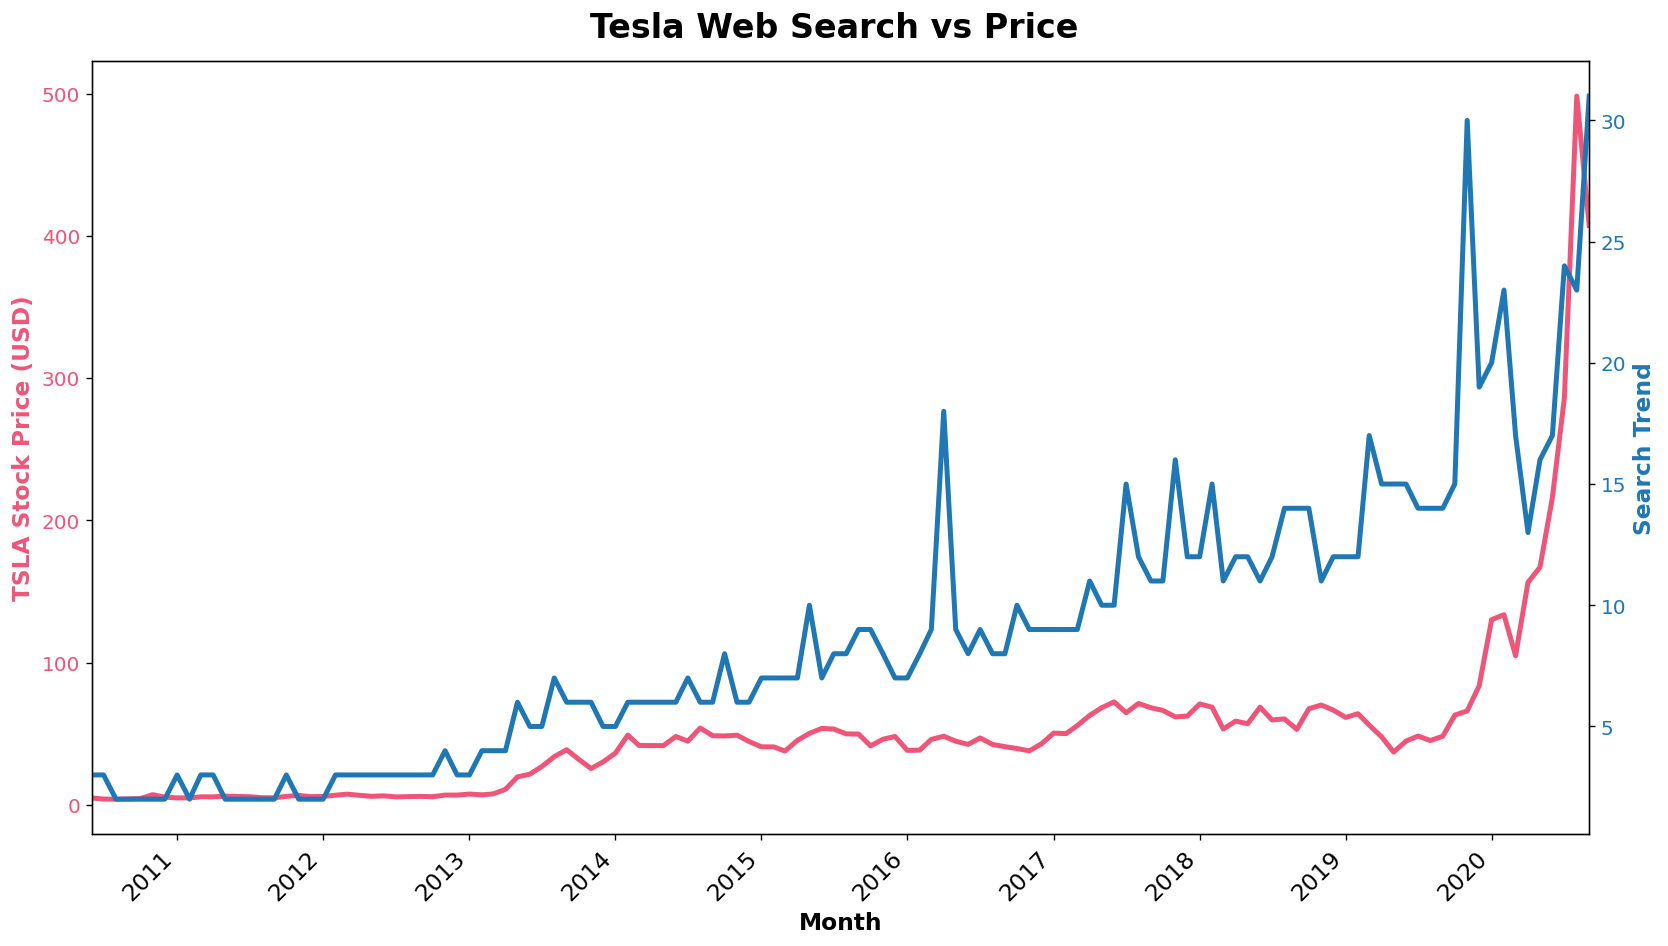

In [229]:
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=120)

fig.suptitle('Tesla Web Search vs Price', size=20, weight='bold')

price_color = '#EF5578'
ax1.set_xlabel('Month', size=14, weight='bold')
ax1.set_ylabel('TSLA Stock Price (USD)', size=14, color=price_color, weight='bold')
ax1.tick_params(axis='y', labelsize=12, labelcolor=price_color)
ax1.tick_params(axis='x', labelsize=14, labelrotation=45)
ax1.set_xlim([pd.to_datetime('2010-06-01'), pd.to_datetime('2020-09-01')])
# ax.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color=price_color, linewidth=3)


ax2 = ax1.twinx()

search_color = 'tab:blue'
ax2.set_ylabel('Search Trend', size=14, color=search_color, weight='bold')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color=search_color, linewidth=3)
ax2.tick_params(axis='y', labelsize=12, labelcolor=search_color)

for label in ax1.get_xticklabels():
    label.set(rotation=45, ha='right')

fig.tight_layout() 
plt.show()

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?